<a href="https://colab.research.google.com/github/ArchanaNan/LoanApprovalPredictionKaggle/blob/main/InsightsNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import requests
train_file_url = "https://raw.githubusercontent.com/ArchanaNan/LoanApprovalPredictionKaggle/refs/heads/main/train.csv"
test_file_url = "https://raw.githubusercontent.com/ArchanaNan/LoanApprovalPredictionKaggle/refs/heads/main/test.csv"
sample_submission_url = "https://raw.githubusercontent.com/ArchanaNan/LoanApprovalPredictionKaggle/refs/heads/main/sample_submission.csv"
#r = requests.get(file_url, stream = True)


In [11]:
train_df = pd.read_csv(train_file_url)
test_df = pd.read_csv(test_file_url)
sample_submission_df = pd.read_csv(sample_submission_url)

In [13]:
train_df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0


In [15]:
test_df.head(2)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4


In [17]:
train_df.shape

(58645, 13)

In [22]:
from sklearn.model_selection import train_test_split
X =  train_df.drop('loan_status', axis=1)
X = X[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']]
y = train_df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [33]:
y_test_np = y_test.to_numpy()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_np, y_pred)
mse = mean_squared_error(y_test_np, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [37]:
rmse

0.3532970777324411

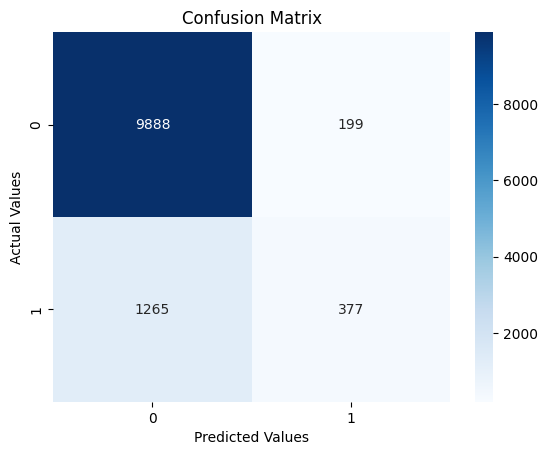

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test_np, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [40]:
(9888+377)/(9888+199+1265+377)

0.8751811748657174